# CART Decision Trees (15 marks)

In [29]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.pipeline import make_pipeline
import sklearn.tree as tree
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import graphviz
from scipy.stats import norm, zscore
from sklearn.preprocessing import StandardScaler
from model_utils import learning_curves, preprocess_housing

In [23]:
california_housing = fetch_california_housing(as_frame=True)
x = california_housing.data
print(x.shape)
y = california_housing.target
print(y.shape)
feature_names = california_housing.feature_names

(20640, 8)
(20640,)


In [24]:
X_train, X_test, y_train, y_test = preprocess_housing(x,y)

data has no null values
Removed 846 outlier rows
Target value counts: 5.00001    965
Name: MedHouseVal, dtype: int64
Removed 670 skewed rows


Training set accuracy: 1.0
Test set accuracy: 0.5105115394381325


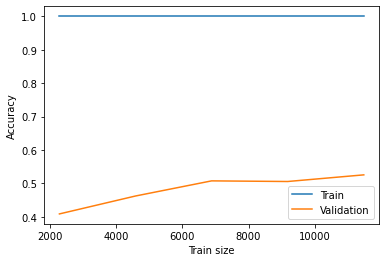

In [51]:
# Apply a decision tree regressor to the California housing dataset

tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)
t1 = tree.score(X_train, y_train)
t2 = tree.score(X_test, y_test)
print("Training set accuracy:", t1)
print("Test set accuracy:", t2)

learning_curves(tree, X_train, y_train)

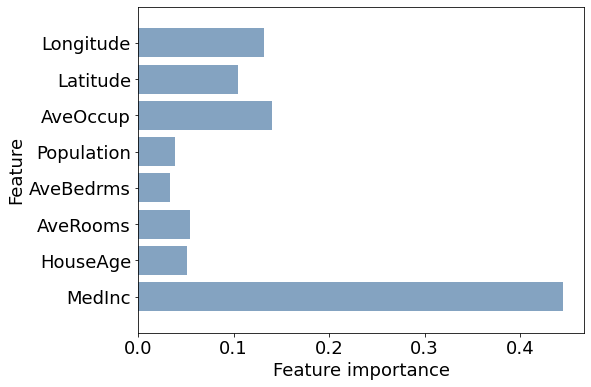

In [27]:
# Plot the influence of each feature on output

def feature_importance(model):
 plt.figure(figsize=(8,6))
 n_features = 8
 plt.barh(range(n_features), model.feature_importances_, align='center', color=(0.2, 0.4, 0.6, 0.6))
 plt.yticks(np.arange(n_features), feature_names)
 plt.xlabel('Feature importance')
 plt.ylabel('Feature')
 plt.ylim(-1, n_features)
feature_importance(tree)
plt.plot('feature_importance')

best score : -0.34431329013942114
best params : {'decisiontreeregressor__max_depth': 9, 'decisiontreeregressor__max_features': 5}
Training set accuracy: 0.7499888638017004
Test set accuracy: 0.5995989336286479


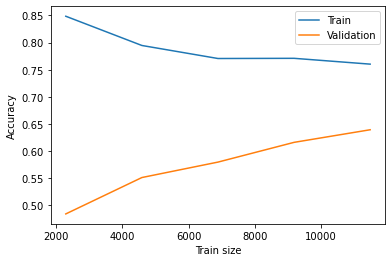

In [52]:
# Use a grid search to tune max depth and max features hyperparameters

def GridSearchCV_(mod, param_grid, X_train, y_train):
    grid = GridSearchCV(estimator=mod, param_grid=param_grid, cv= 5, scoring='neg_mean_squared_error')
    
    grid.fit(X_train, y_train)
    model_best_params = grid.best_estimator_
    
    print('best score :', grid.best_score_ )
    print('best params :', grid.best_params_ )
    
    return model_best_params

tuner = make_pipeline(DecisionTreeRegressor())
param_grid = {'decisiontreeregressor__max_depth':np.arange(5, 30, 1), 
              'decisiontreeregressor__max_features':np.arange(5, 8, 1)               
             }

tuned_tree = GridSearchCV_(tuner, param_grid , X_train, y_train)
t1 = tuned_tree.score(X_train, y_train)
t2 = tuned_tree.score(X_test, y_test)    
print("Training set accuracy:", t1)
print("Test set accuracy:", t2)

# Plot learning curves for model after parameter tuning
learning_curves(tuned_tree, X_train, y_train)

Text(0, 0.5, 'accuracy')

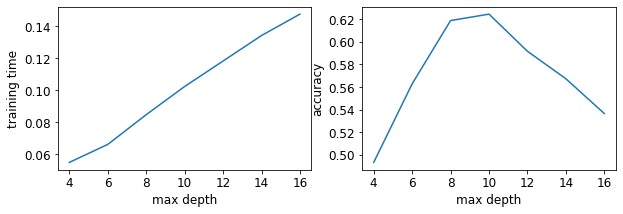

In [50]:
# Plot training times and accuracies for max depth values

times = []
max_depths = [4,6,8,10,12,14,16]
train_accuracies = []
test_accuracies = []
for max_depth in max_depths:
    tree = DecisionTreeRegressor(max_depth=max_depth)
    start = time.time()
    tree.fit(X_train, y_train)
    end = time.time()
    times.append(end-start)
    t1 = tree.score(X_train, y_train)
    t2 = tree.score(X_test, y_test)
    train_accuracies.append(t1)
    test_accuracies.append(t2)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharex=True)
plt.rcParams.update({'font.size': 10})

x = range(len(max_depths))
axs[0].plot(x, times)
axs[0].set_xticks(x, max_depths)
axs[0].set_xlabel('max depth')
axs[0].set_ylabel('training time')
axs[1].plot(x, test_accuracies)
axs[0].set_xticks(x, max_depths)
axs[1].set_xlabel('max depth')
axs[1].set_ylabel('accuracy')

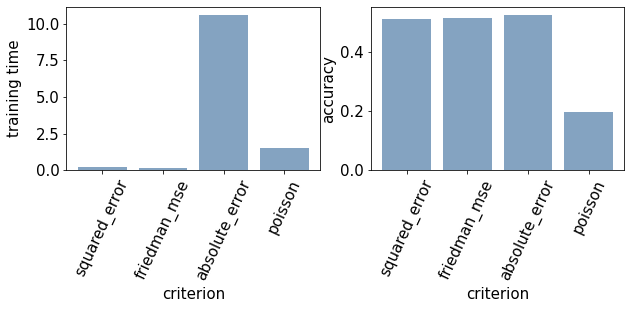

In [47]:
# Plot training times and accuracies for criterions

criterions = ["squared_error", "friedman_mse", "absolute_error", "poisson"]
times = []
train_accuracies = []
test_accuracies = []
for criterion in criterions:
    tree = DecisionTreeRegressor(criterion = criterion)
    start = time.time()
    tree.fit(X_train, y_train)
    end = time.time()
    times.append(end-start)
    t1 = tree.score(X_train, y_train)
    t2 = tree.score(X_test, y_test)
    train_accuracies.append(t1)
    test_accuracies.append(t2)

fig, axs = plt.subplots(1, 2, figsize=(10, 3), sharex=True)
plt.rcParams.update({'font.size': 15})
axs[0].bar(criterions, times, color=(0.2, 0.4, 0.6, 0.6))
axs[0].set_xlabel('criterion')
axs[0].set_ylabel('training time')
axs[1].bar(criterions, test_accuracies, color=(0.2, 0.4, 0.6, 0.6))
axs[1].set_xlabel('criterion')
axs[1].set_ylabel('accuracy')
for tick in axs[0].get_xticklabels():
    tick.set_rotation(65)
for tick in axs[1].get_xticklabels():
    tick.set_rotation(65)

In [7]:
# Visualise the optimised tree

opt_tree = DecisionTreeRegressor(random_state=0, max_depth=8, max_features=6)
opt_tree.fit(X_train, y_train)
t1 = opt_tree.score(X_train, y_train)
t2 = opt_tree.score(X_test, y_test)

print("Training set accuracy:", t1)
print("Test set accuracy:", t2)

dot_data = tree.export_graphviz(opt_tree, out_file=None, feature_names=feature_names, class_names=y_train, filled=True, rounded=True, special_characters=True)  
graph = graphviz.Source(dot_data)
graph.render(directory='decision_tree')
#display(graph)


R squared of Decision Tree Regressor on training set: 0.6980395695328876
R squared of Decision Tree Regressor on test set: 0.6089501308602043


'decision_tree/Source.gv.pdf'

# Ensemble Methods (10 marks) (I've chosen to use AdaBoost)

In [133]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
ada_model = AdaBoostRegressor(opt_tree, random_state=0, n_estimators=100)
ada_model.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8,
                                                       max_features=6,
                                                       random_state=0),
                  n_estimators=100, random_state=0)

0.8235286709741005
0.7576002622016478


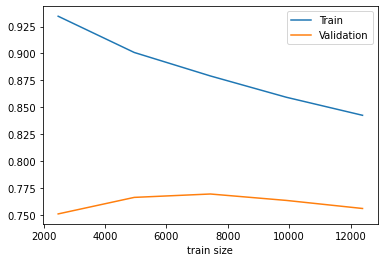

In [119]:
learning_curves(ada_model, X_train, y_train)
print(ada_model.score(X_train, y_train))
print(ada_model.score(X_test, y_test))

Text(0, 0.5, 'accuracy')

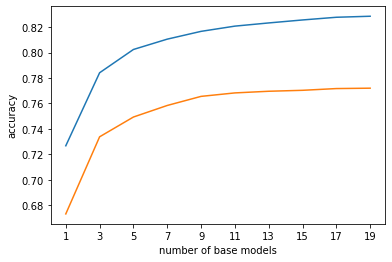

In [141]:
# Investigating effect of changing number of base models

num_models = [1,3,5,7,9,11,13,15,17,19]
train_accuracies = []
test_accuracies = []
for models in num_models:
    ada_model = AdaBoostRegressor(opt_tree, random_state=0, n_estimators=models)
    ada_model.fit(X_train, y_train)
    train_accuracy = ada_model.score(X_train, y_train)
    test_accuracy = ada_model.score(X_test, y_test)
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
x = range(len(num_models))
plt.plot(x, train_accuracies)
plt.plot(x, test_accuracies)

plt.xticks(x, num_models)
plt.xlabel('number of base models')
plt.ylabel('accuracy')